# 1. Data

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
red = pd.read_csv("winequality-red.csv",sep=';')
white = pd.read_csv("winequality-white.csv",sep=';')

## Red wine

In [42]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [43]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


It can be seen apart from the "quality" feature that uses integers, all the other features utilize float numbers. Even though the "quality" may contain different categories, the hierachy is suggested by the integer. Hence, it's fine to keep them this way. No string type is spotted which convenient for analysis. It's worth noting that the range of float numbers is quite diversified, which entails a standardization process.

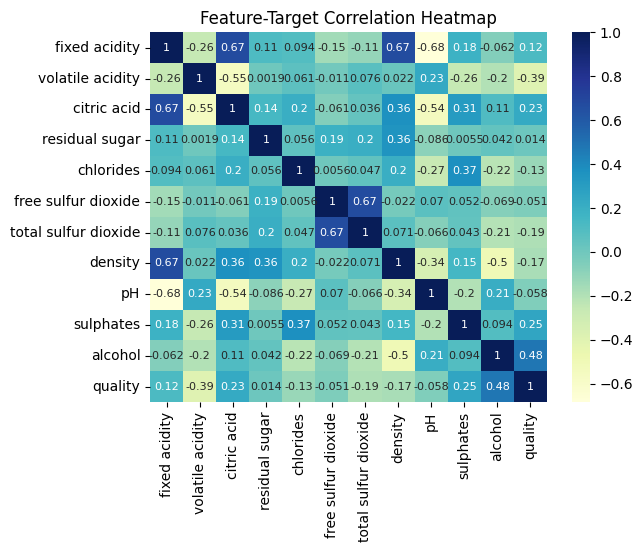

<Figure size 3000x2000 with 0 Axes>

In [27]:
sns.heatmap(red.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 8})
plt.title("Feature-Target Correlation Heatmap")
plt.figure(figsize=(30, 20))
plt.show()

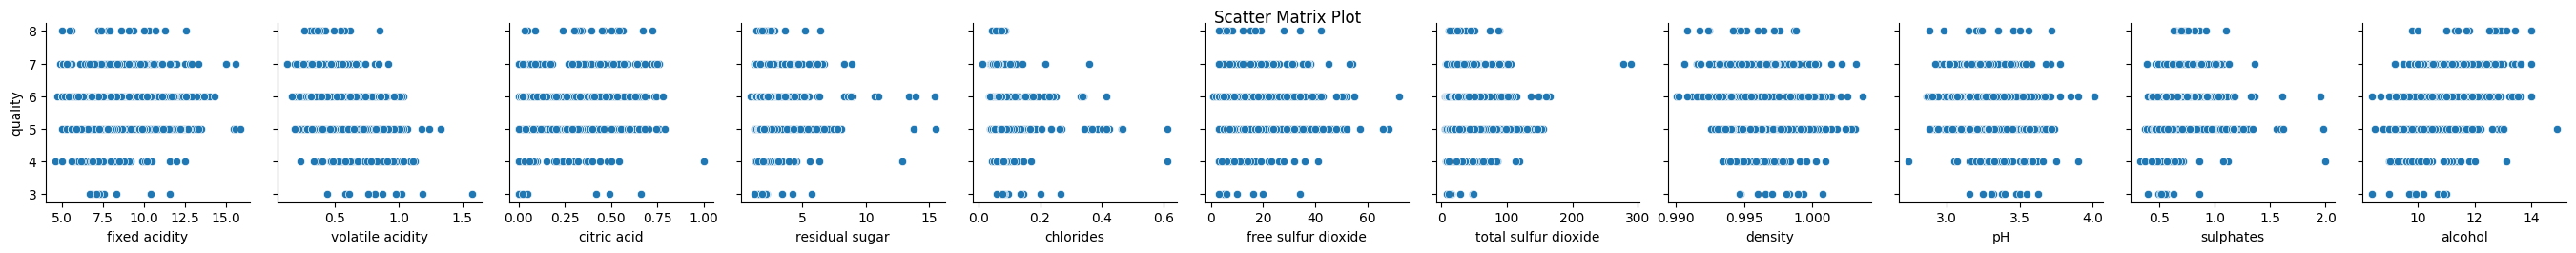

In [21]:
sns.pairplot(red, x_vars=red.columns.tolist()[:-1], y_vars=["quality"])
plt.suptitle("Scatter Matrix Plot", y=1.02)
plt.show()

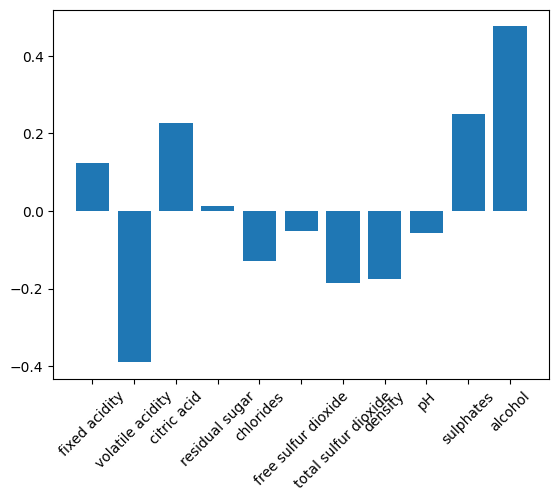

In [37]:
plt.bar(red.columns.tolist()[:-1],red.corr()['quality'][:-1])
plt.xticks(rotation=45)
plt.show()

Alcohol and volatile acidity are the 2 dominant factors, with the former having a positive correlation and the latter negative. Residual sugar, free sulfur dioxide and pH seem trivial. Nevertheless, the strongest correlation is less than half.

## White wine

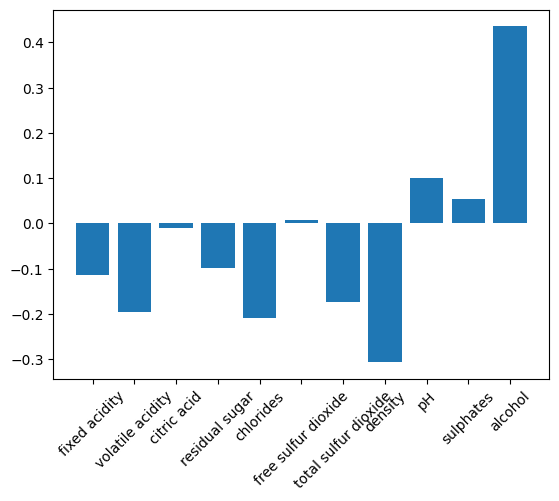

In [40]:
plt.bar(white.columns.tolist()[:-1],white.corr()['quality'][:-1])
plt.xticks(rotation=45)
plt.show()

Alcohol still takes the lion's share, being one of the few positive factors. Density, chlorides, volatile acidity and total sulfur dioxide are the main negative factors.

# 2. Closed-form OLS Solution

In [45]:
from sklearn.datasets import make_regression

In [68]:
X, y,coeffs = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42,coef=True)
beta = np.linalg.inv(X.T@X)@X.T@y
print("result from the solution: ",beta,'\n\n',
  "result from the function: ", coeffs,'\n\n',
   "difference:",beta - coeffs)

result from the solution:  [16.76546205 54.14200341  5.18335448 63.63537704 93.61744444 70.64217715
 87.08165291 10.44318875  3.16509044 70.90448128] 

 result from the function:  [16.74825823 54.12963353  5.19712837 63.64302495 93.62122462 70.64757265
 87.09691237 10.45678403  3.15861448 70.90605195] 

 difference: [ 0.01720383  0.01236988 -0.01377388 -0.00764791 -0.00378018 -0.0053955
 -0.01525946 -0.01359528  0.00647596 -0.00157066]


Potential shortcoming:

If there exist multiple features with considerable samples, the calculation could be extremely time-consuming. Moreover, it's may not be accurate enough.

# 3. Wine Quality Regression

coming soon...